In [1]:
!python get_global_embeddings.py --model_path "../../models/OG_models/pre_trained_pointnet_epoch_100.pth" --dataset_type "modelnet40" --dataset_path "../../dataset/ModelNet40_blender_sampling_1024/ModelNet40_blender_sampling_1024/" --log_dir "OG_model_global_embeddings/"

2023-05-25 17:49:21.543109: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-25 17:49:24.101797: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
None
Random Seed:  2110
9843 2468
classes 40
Copying parameters
Restored Params and Shapes:
None using weight decay
78it [00:06, 12.62it/s]
(2468, 1024) (2468,)


In [2]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

In [9]:
tsne = TSNE(n_components=2, learning_rate='auto')

In [10]:
global_embeddings = np.load("OG_model_global_embeddings/global_features.npy")
labels = np.load("OG_model_global_embeddings/targets.npy")

In [11]:
compressed_global_embeddings = tsne.fit_transform(global_embeddings)

In [12]:
compressed_global_embeddings[:, 0].shape

(2468,)

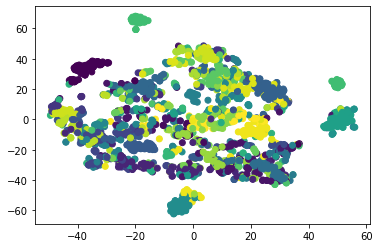

In [13]:
plt.scatter(compressed_global_embeddings[:, 0], compressed_global_embeddings[:, 1], c = labels)

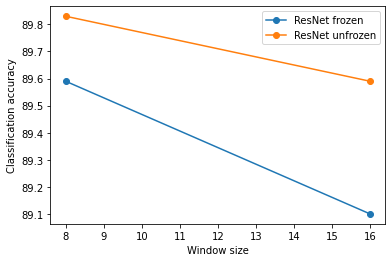

In [23]:
plt.plot([8, 16], [89.59, 89.10], label = "ResNet frozen", marker = "o")
plt.plot([8, 16], [89.83, 89.59], label = "ResNet unfrozen", marker = "o")
plt.legend()
plt.xlabel("Window size")
plt.ylabel("Classification accuracy")
plt.savefig("temp.png")

In [ ]:
resnet frozen WS 16 - 89.10%
resnet frozen WS 8 - 89.59%
resnet unfrozen WS 16 - 89.59%
resnet unfrozen WS 8 - 89.83%